## Feature Engineering - PCA

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

X=iris.data
y=iris.target

In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [4]:
from sklearn.decomposition import PCA

pca=PCA()

In [5]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [10]:
print('The variance values of PC components are:\n',pca.explained_variance_ratio_)

The variance values of PC components are:
 [0.69489568 0.25830074 0.04239017 0.0044134 ]


In [9]:
pca2=PCA(n_components=2)

X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.fit_transform(X_test)

print('The variance values of PC components are:\n',pca2.explained_variance_ratio_)

The variance values of PC components are:
 [0.69489568 0.25830074]


In [11]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_train_pca2.shape)
print(X_test_pca2.shape)

(112, 4)
(38, 4)
(112, 2)
(38, 2)


In [17]:
# Model build

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train_pca2,y_train)

knn2=KNeighborsClassifier()
knn2.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred_pca2 = knn.predict(X_test_pca2)
y_pred_pca = knn2.predict(X_test_pca)

from sklearn.metrics import accuracy_score

print('The accuracy of model prediction using 2 PC: \n',accuracy_score(y_test,y_pred_pca2))
print('The accuracy of model prediction using all PC: \n',accuracy_score(y_test,y_pred_pca))

The accuracy of model prediction using 2 PC: 
 0.868421052631579
The accuracy of model prediction using all PC: 
 0.8947368421052632


Text(0, 0.5, 'Second PC')

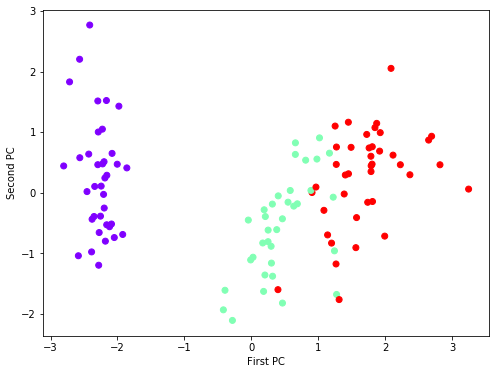

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(X_train_pca2[:,0],X_train_pca2[:,1],c=y_train,cmap='rainbow')
plt.xlabel("First PC")
plt.ylabel("Second PC")

## Feature Engineering - LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)
# Model build

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train_lda,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred_lda = knn.predict(X_test_lda)

from sklearn.metrics import accuracy_score

print('The accuracy of model prediction using 2 LDA: \n',accuracy_score(y_test,y_pred_lda))

The accuracy of model prediction using 2 LDA: 
 0.9210526315789473


Text(0, 0.5, 'Second LDA')

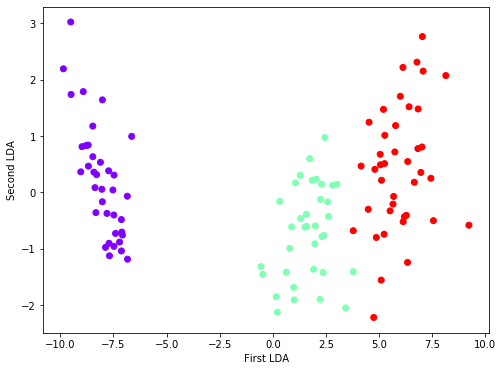

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap='rainbow')
plt.xlabel("First LDA")
plt.ylabel("Second LDA")

Tilt in LDA  - the points are close to each other hence better discrimination than PCA for supervised learning